In [138]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

db_num = pd.read_csv('C:/projects/laboratory/Nanoparticle_cytotoxicity/databases/Final/numerical.csv')

db_cat = pd.read_csv('C:/projects/laboratory/Nanoparticle_cytotoxicity/databases/Final/categorical.csv')

y = np.log10(db_num.loc[:, 'viability (%)']+0.00001)
x_num = db_num.loc[:, db_num.columns != 'viability (%)']

sc = MinMaxScaler()
x_num = pd.DataFrame(sc.fit_transform(x_num),
                 columns=['del', 'time (hr)', 'concentration (ug/ml)', 'Hydrodynamic diameter (nm)', 'Zeta potential (mV)'])

del x_num['del']

In [143]:
compounds = list(db_cat['material'].unique())

In [162]:
from pubchempy import get_compounds, \
                      get_properties

smiles = []
for compound in compounds:
    for compound_obj in get_compounds(compound, 'name'):
        smiles.append(compound_obj.canonical_smiles)

In [163]:
smiles

['O=[Si]=O',
 'O=[Fe].O=[Fe]O[Fe]=O',
 '[Ag]',
 'O=[Ti]=O',
 '[Au]',
 'O=[Zn]',
 '[Pt]',
 'O=[Cu]',
 'O=[Ce]=O',
 '[C]',
 '[Ni]',
 '[O-2].[O-2].[O-2].[Al+3].[Al+3]',
 'O=[Zr]=O',
 '[Cu]',
 'O=[Fe]O[Fe]=O',
 'O=[Mn]O[Mn]=O',
 'O=[Gd]O[Gd]=O',
 'O=[Hf]=O',
 'O=[In]O[In]=O',
 'O1[Sb]2O[Sb]3O[Sb]1O[Sb](O2)O3']

In [ ]:
encoder = ce.OrdinalEncoder(return_df=True)
x_cat = pd.DataFrame(encoder.fit_transform(db_cat))
del x_cat['Unnamed: 0']

In [139]:
x = pd.concat([x_cat,x_num], axis=1)

bins = np.linspace(0, 4, 1)
y_binned = np.digitize(y, bins)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y_binned)

In [135]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=500, min_samples_leaf=1, criterion='absolute_error')

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)

(-1.5, 3.0)

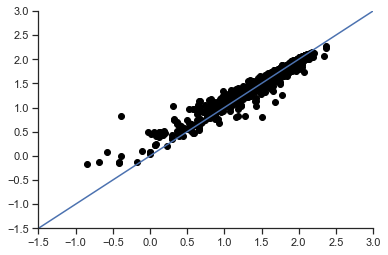

In [136]:
min = -1.5
max = 3

plt.plot(y_train, y1_pred, 'o', color='black')
plt.plot([min,max], [min,max])
plt.xlim(min,max)
plt.ylim(min,max)

Q2: 0.7100396688099473
r2_test: 0.7475955077593286
MAE_test: 0.09026428622302876
MSE_test: 0.05292861789867102
RMSE_test: 0.23006220441148306
r2_train: 0.9627162364672965
MAE_train: 0.03599589652142465
MSE_train: 0.0058553300111651675
RMSE_train: 0.0765201281439411


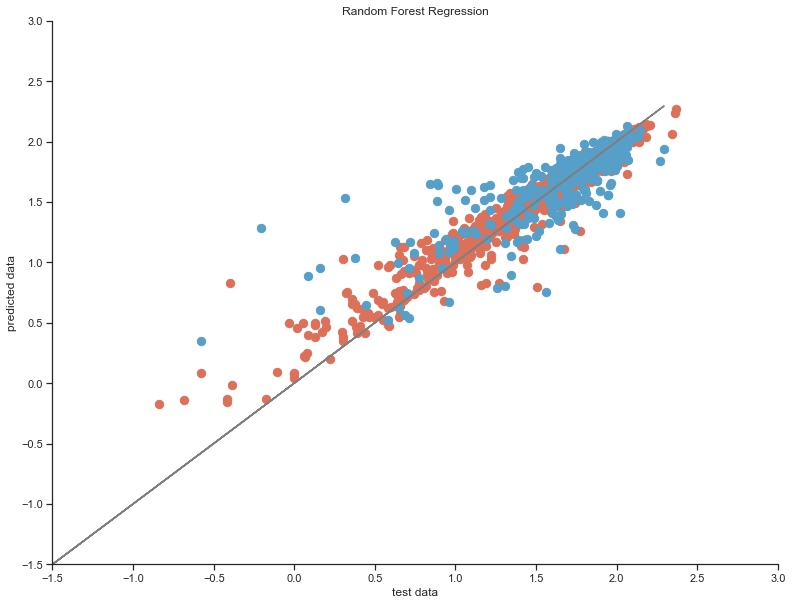

In [137]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(regressor, x_train, y_train.ravel(), cv=10)
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
plt.title('Random Forest Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(min,max)
plt.ylim(min,max)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def rfr_model(x, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(x, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    scores = cross_val_score(rfr, x, y, cv=10, 
                             scoring='neg_mean_absolute_error')

    return scores

predictions = cross_val_predict(rfr, x, y, cv=10)
accuracy = cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                           scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
plt.title('Random Forest Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(0.25, 1)
plt.ylim(0.25, 1)
plt.show()